In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

ModuleNotFoundError: No module named 'random.Random'; 'random' is not a package

In [18]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1,random_state=5)

In [19]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.121660,-1.348986,0.000979,1.014254,-1.599263,1
1,1.659876,-1.971824,-0.136807,0.293809,0.128575,0
2,1.456569,-1.363260,1.220083,1.337143,0.345040,0
3,-3.095970,0.606867,0.209768,3.118665,-0.886965,1
4,1.291644,-0.157602,-0.174554,0.382067,0.241007,0


In [20]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [25]:
sample_rows(df,0.3)

,col1,col2,col3,col4,col5,target
50,-0.646480,-1.141091,2.834445,2.696466,-2.884083,1
86,-1.584555,-0.226864,0.919681,0.232321,-0.384343,1
56,-2.452556,-1.003052,0.908985,1.693305,-2.492039,1
22,2.591455,-0.864094,-1.287892,-0.836362,1.947255,0
50,-0.646480,-1.141091,2.834445,2.696466,-2.884083,1
19,1.353841,0.466463,-0.776783,-0.483321,1.275857,0
28,1.028424,-2.319798,1.611269,-0.414405,-0.770323,1
66,-2.032053,-1.041524,0.565383,1.459951,-0.657779,1
99,2.047613,-0.328921,-1.261697,-0.397880,0.822125,0
87,1.449246,-1.344260,-0.936372,-0.687520,0.841495,0


In [86]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [87]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [95]:
df1 = sample_features(df,0.8)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [96]:
df2 = sample_features(df,0.8)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [97]:
df3 = sample_features(df,0.8)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [115]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col4', 'col2', 'col3', 'target'], dtype='object')
Index(['col1', 'col4', 'col5', 'col3', 'target'], dtype='object')
Index(['col4', 'col1', 'col2', 'col3', 'target'], dtype='object')


In [103]:
df1.shape

(100, 5)

In [104]:
df2.shape

(100, 5)

In [105]:
df3.shape

(100, 5)

In [106]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [110]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

In [111]:
from sklearn.tree import plot_tree

[Text(0.4642857142857143, 0.9285714285714286, 'x[1] <= 0.443\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.21428571428571427, 0.7857142857142857, 'x[3] <= 0.365\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.14285714285714285, 0.6428571428571429, 'x[1] <= -0.601\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.21428571428571427, 0.5, 'x[0] <= 1.277\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.14285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2857142857142857, 0.6428571428571429, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7142857142857143, 0.7857142857142857, 'x[0] <= 0.319\ngini = 0.21\nsamples = 42\nvalue = [5, 37]'),
 Text(0.5714285714285714, 0.6428571428571429, 'x[3] <= 0.544\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 T

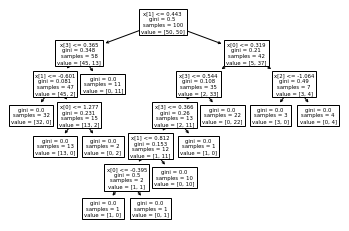

In [112]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.9, 'x[1] <= 0.443\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.7, 'x[3] <= 0.365\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.16666666666666666, 0.5, 'x[0] <= -1.377\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 1.312\ngini = 0.21\nsamples = 42\nvalue = [5, 37]'),
 Text(0.5, 0.5, 'x[2] <= 1.045\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.5833333333333334, 0.3, 'x[1] <= 0.668\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.5, 'x[3] <=

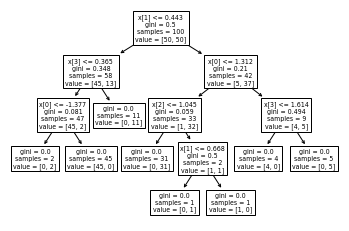

In [113]:
plot_tree(clf2)

[Text(0.4583333333333333, 0.9, 'x[0] <= 0.443\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.7, 'x[3] <= 0.365\ngini = 0.348\nsamples = 58\nvalue = [45, 13]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -1.377\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 1.312\ngini = 0.21\nsamples = 42\nvalue = [5, 37]'),
 Text(0.5, 0.5, 'x[0] <= 0.713\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.4166666666666667, 0.3, 'x[2] <= -1.318\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.8333333333333334, 0.5, 'x[3]

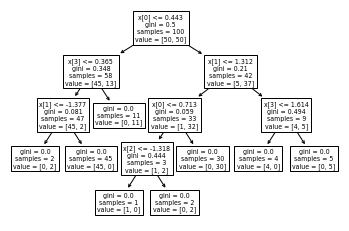

In [114]:

plot_tree(clf3)

In [116]:
clf1.predict(np.array([1.042498,-0.062147,-0.965487,-.054218]).reshape(1,4))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [118]:
clf2.predict(np.array([1.042498,-0.062147,-0.965487,-.054218]).reshape(1,4))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [120]:
clf3.predict(np.array([1.042498,-0.062147,-0.965487,-.054218]).reshape(1,4))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [121]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
93,0.183746,0.794696,-0.489377,0.221472,-0.545401,0
96,-0.606385,-2.162367,-1.452602,-3.036884,2.027885,0
37,-0.229793,-1.447017,-2.973562,-5.256152,4.586129,0
50,-0.646480,-1.141091,2.834445,2.696466,-2.884083,1
93,0.183746,0.794696,-0.489377,0.221472,-0.545401,0
79,2.974949,-2.973407,1.856565,0.687686,-3.742561,1
4,1.291644,-0.157602,-0.174554,0.382067,0.241007,0
72,1.770366,0.183213,-2.782346,-2.026052,1.551937,0
74,0.409718,-0.397708,-2.221169,-2.167886,1.007135,0
1,1.659876,-1.971824,-0.136807,0.293809,0.128575,0


In [122]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [123]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [124]:

df3 = combined_sampling(df,0.5,0.5)

<ipython-input-86-6f80f89253cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [125]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [126]:
df3

,col2,col3,target
7,-0.080952,-0.598783,1
42,-2.033256,-1.137038,0
75,-0.730443,3.012831,1
93,0.794696,-0.489377,0
7,-0.080952,-0.598783,1
84,-4.218862,-0.645581,0
2,-1.363260,1.220083,0
42,-2.033256,-1.137038,0
0,-1.348986,0.000979,1
4,-0.157602,-0.174554,0


In [127]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [128]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [129]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9285714285714286, 'x[0] <= 0.535\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.3, 0.7857142857142857, 'x[1] <= -0.856\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.6428571428571429, 'x[1] <= 1.048\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.3, 0.5, 'x[1] <= 0.958\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.35714285714285715, 'x[0] <= -0.021\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3, 0.21428571428571427, 'x[0] <= 0.12\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.7, 0.78

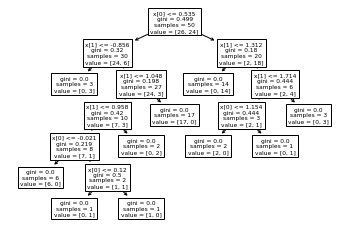

In [130]:
plot_tree(clf1)

[Text(0.5925925925925926, 0.9444444444444444, 'x[1] <= 1.432\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5185185185185185, 0.8333333333333334, 'x[0] <= -2.636\ngini = 0.469\nsamples = 40\nvalue = [15, 25]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[1] <= -1.54\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.25925925925925924, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4074074074074074, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7037037037037037, 0.7222222222222222, 'x[0] <= 0.193\ngini = 0.415\nsamples = 34\nvalue = [10, 24]'),
 Text(0.5555555555555556, 0.6111111111111112, 'x[0] <= -0.143\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.48148148148148145, 0.5, 'x[1] <= -0.332\ngini = 0.413\nsamples = 24\nvalue = [7, 17]'),
 Text(0.2962962962962963, 0.3888888888888889, 'x[1] <= -1.985\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.14814814814814814, 0.2777777777777778, 'x[1] <= -2.434\ngin

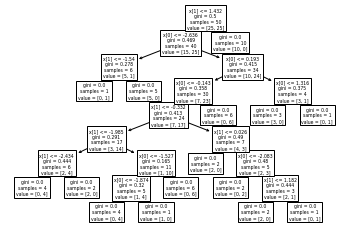

In [131]:
plot_tree(clf2)

[Text(0.4, 0.9375, 'x[1] <= -0.622\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.3, 0.8125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.5, 0.8125, 'x[1] <= 0.42\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.2, 0.6875, 'x[0] <= -1.461\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.1, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.5625, 'x[0] <= -1.14\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4, 0.4375, 'x[1] <= -0.544\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.3125, 'x[0] <= -0.408\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4, 0.1875, 'x[1] <= -0.066\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = 

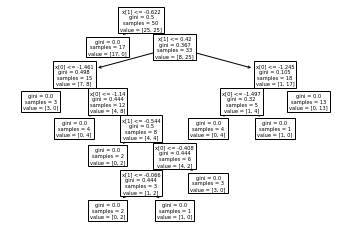

In [132]:
plot_tree(clf3)

In [136]:
clf1.predict(np.array([-1.348980,0.000979	]).reshape(1,2))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [137]:
clf2.predict(np.array([-1.348980,0.000979]).reshape(1,2))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [138]:
clf3.predict(np.array([-1.348980,0.000979]).reshape(1,2))

C:\Users\OM\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])